# Forecasting moss & lichen fractional cover mean
## with a Neural Network using Keras
## (Reading X and Y train/test files stored locally)
#
# For lichen output only

In [ ]:
pip install tensorflow tables --quiet

In [5]:
print('Starting imports')
import numpy as np
import os
import pandas as pd
import seaborn  as sns
from tensorflow import keras
import keras.utils
print('Finished imports')

Starting imports
Finished imports


In [83]:
Hlayers = 8
Olayers = 1
epochs = 32
Hactivation = 'tanh'
Oactivation='sigmoid'
print('Hidden layers = ', Hlayers)
print('Output layers = ', Olayers)
print('Hidden layer activation = ', Hactivation)
print('Output layer activation = ', Oactivation)
print('Epochs = ', epochs)
expname = 'TPS_mean_' + str(Hlayers) + 'Hlayers-' + str(Olayers) + 'Olayers-' + str(epochs) + 'epochs-' + Hactivation + '-' + Oactivation
print('Experiment name = ', expname)

Hidden layers =  8
Output layers =  1
Hidden layer activation =  tanh
Output layer activation =  sigmoid
Epochs =  32
Experiment name =  TPS_mean_8Hlayers-1Olayers-32epochs-tanh-sigmoid


In [84]:
# Read local .hdf file
path = '/home/jovyan/Arctic/Vegetation_in_Troms_and_Finnmark/data/'

print('Reading X_train')
X_train_file = os.path.join(path, 'X_mean_tp_train.hdf')
X_train = pd.read_hdf(X_train_file)
X_train.fillna(0, inplace=True)

print('Reading X_test')
X_test_file = os.path.join(path, 'X_mean_tp_test.hdf')
X_test = pd.read_hdf(X_test_file)
X_test.fillna(0, inplace=True)

print('Reading y_train')
y_train_file = os.path.join(path, 'y_mean_tp_train.hdf')
y_train = pd.read_hdf(y_train_file)
y_train.fillna(0, inplace=True)

print('Reading y_test')
y_test_file = os.path.join(path, 'y_mean_tp_test.hdf')
y_test = pd.read_hdf(y_test_file)
y_test.fillna(0, inplace=True)

Reading X_train
Reading X_test
Reading y_train
Reading y_test


In [85]:
# Instantiate a keras.Input class and tell it how big our input is.
print('Instantiating the Keras input class')
inputs = keras.Input(shape = X_train.shape[1])

# Create the hidden layer
print('Creating the hidden layer')
hidden_layer = keras.layers.Dense(Hlayers, activation=Hactivation)(inputs)

# Create the output layer
print('Creating the output layer')
output_layer = keras.layers.Dense(Olayers, activation=Oactivation)(hidden_layer)

# Create a Keras model
print('Creating the model')
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

# Compile the model with a Mean Square Error loss function and the Adam optimizer
print('Compiling the model')
model.compile(optimizer='sgd', loss=keras.losses.LogCosh())

Instantiating the Keras input class
Creating the hidden layer
Creating the output layer
Creating the model
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 8785)]            0         
                                                                 
 dense_40 (Dense)            (None, 8)                 70288     
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 70,297
Trainable params: 70,297
Non-trainable params: 0
_________________________________________________________________
Compiling the model


In [86]:
# Train the model
print('Training the model')
history = model.fit(X_train, y_train, epochs=epochs)

Training the model
Epoch 1/32
69/69 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 2/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 3/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 4/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 5/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 6/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 7/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 8/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 9/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 10/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 11/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 12/32
69/69 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 13/32
69/69 [===========

Generating the history loss plot


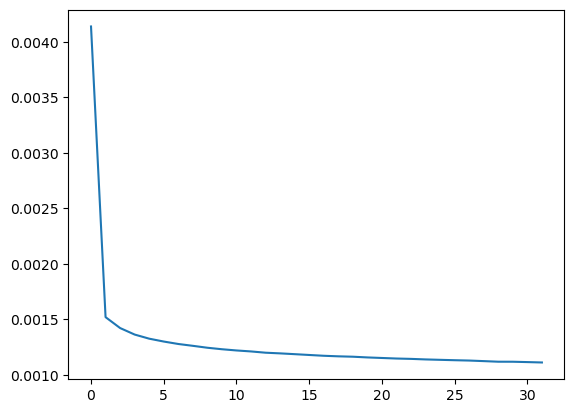

In [87]:
# Plot the loss history
print('Generating the history loss plot')
lineplot = sns.lineplot(x=history.epoch, y=history.history['loss'])
fig = lineplot.get_figure()
loss_fig_file = os.path.join(path, 'outputs/' + expname + '_loss.png')
fig.savefig(loss_fig_file) 

In [ ]:
model_file = os.path.join(path, 'outputs/' + expname + '.h5')
model.save(model_file)

In [ ]:
y_test.plot()

In [88]:
# Perform a prediction
print('Forecasting', y_test.sum())
y_forecast = model.predict(X_test)
print(X_test['Lichen_mean'])
forecast = pd.DataFrame(y_forecast, columns=y_test.columns)
print('Forecast', forecast.sum())
forecast

Forecasting new_Lichen_mean    49.908648
dtype: float64
18/18 [==============================] - 0s 3ms/step
2400    0.010000
1590    0.126944
2380    0.040000
2445    0.124014
1147    0.020000
          ...   
2414    0.126800
1043    0.030000
878     0.080833
1762    0.030000
303     0.039500
Name: Lichen_mean, Length: 549, dtype: float64
Forecast new_Lichen_mean    48.44688
dtype: float32


,new_Lichen_mean
0,0.100845
1,0.108685
2,0.062456
3,0.128949
4,0.068973
...,...
544,0.149673
545,0.127886
546,0.124331
547,0.070132


<AxesSubplot:>

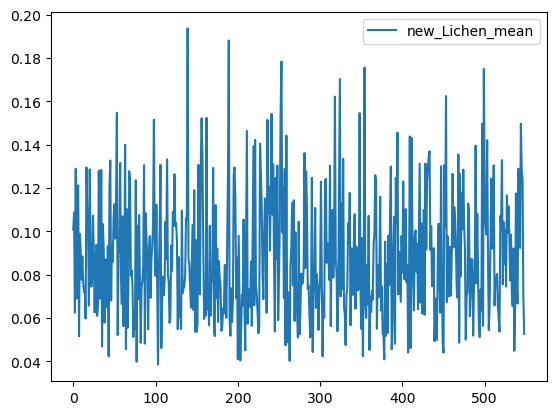

In [89]:
forecast.plot()

In [90]:
filename = os.path.join(path, 'ytest.csv')
y_test.to_csv(filename, header=True, index=None, sep=',')

In [91]:
filename = os.path.join(path, 'yforecast.csv')
forecast.to_csv(filename, header=True, index=None, sep=',')

In [95]:
forecast.new_Lichen_mean.tolist()

[0.10084474831819534,
 0.10868459939956665,
 0.06245582550764084,
 0.12894850969314575,
 0.06897324323654175,
 0.11943638324737549,
 0.12127882242202759,
 0.05161433294415474,
 0.09887002408504486,
 0.09151484817266464,
 0.07766840606927872,
 0.08846887946128845,
 0.07667284458875656,
 0.07201971858739853,
 0.07306782156229019,
 0.05977899953722954,
 0.12955929338932037,
 0.11183761060237885,
 0.101755790412426,
 0.06572481244802475,
 0.12861599028110504,
 0.09428518265485764,
 0.07451281696557999,
 0.07991635799407959,
 0.10729850083589554,
 0.0885808914899826,
 0.06257450580596924,
 0.08553502708673477,
 0.09379919618368149,
 0.06103461608290672,
 0.06647853553295135,
 0.12799040973186493,
 0.10238765180110931,
 0.06886535882949829,
 0.12840528786182404,
 0.04685968533158302,
 0.10337657481431961,
 0.09150692075490952,
 0.05786620453000069,
 0.08713715523481369,
 0.07829424738883972,
 0.0650119036436081,
 0.09320151805877686,
 0.042286600917577744,
 0.12036323547363281,
 0.1326829046

In [ ]:
print('Finished!')